# CSCI4022 Homework 5; Graphs and A-Priori

## Due Monday, March 29 at 11:59 pm to Canvas

#### Submit this file as a .ipynb with *all cells compiled and run* to the associated dropbox.

***

Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- There is *not a prescribed API* for these problems, except the **form of your output for #3**.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm


***
<a/ id='p1'></a>
[Back to top](#top)
# Problem 1 (Practice: A-Priori; 25 pts) 

Consider the Online Retail data set provided in `onlineretail.csv`.  This includes over 500,000 purchases from an online retailer.

We want to use the baskets (marked by `InvoiceNo`) and the items (marked by `StockCode` and/or `Description`) to perform an item basket analysis.

This data set is small enough to run directly from main memory, so you may do that if you wish.  You may also complete this problem using only the first 100,000 entries of the .csv if you wish for shorter computational time.  Be very explicit which you are using.

#### a)  There are some odd entries in the data set.  Make sure that you're discarding any transactions and items with no `Description`, non-positive `Quantity`, or non-positive `Unit Price`.


**I will use only the first 100,000 entries after the data cleaning, for a faster runtime**

In [2]:
df = pd.read_csv ('../Data/onlineretail.csv', encoding= 'unicode_escape') #read data in

In [3]:
df.dropna(subset=['Description'],inplace=True)
df.shape[0]

540455

In [4]:
df.drop(df[df['Quantity'] < 0].index, inplace=True)
df.shape[0]

530693

In [5]:
df.drop(df[df['UnitPrice'] < 0].index, inplace=True)
df.shape[0]

530691

In [6]:
df= df[df['StockCode'].str.isnumeric()].copy() #for 1b and 1c discarding all items with non-integervalues
df.shape[0]

477605

In [7]:
df.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,12/1/2010 8:34,2.10,13047.0,United Kingdom
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,12/1/2010 8:34,2.10,13047.0,United Kingdom
12,536367,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,8,12/1/2010 8:34,3.75,13047.0,United Kingdom
13,536367,22310,IVORY KNITTED MUG COSY,6,12/1/2010 8:34,1.65,13047.0,United Kingdom


In [8]:
df=df.head(100000) #grab first 100,000
df.shape[0]

100000



#### b) For our first iteration, we will use just `StockCode` for the items.  Use `StockCode` to create a table of frequent single items at 1% support threshold.  For convenience on this part of the problem and part c), you may choose to discard all items with non-integer values in `StockCode`.  Was 1% an appropriate support threshold?  Describe why or why not.


In [9]:
#create baskets 
basketList= list(set(df["InvoiceNo"].values))
basketList.sort()
#basketList
#for each basket in basketList
baskets={}
for i in range(len(basketList)):
    t=df.loc[df['InvoiceNo']==basketList[i]]
    b =set(t['StockCode'].values)
    u= {i:b}
    baskets.update(u)

In [10]:
#support threshold
s = .01 * len(baskets)
inventory= list(set(df["StockCode"].values))
lookUp = {x: inventory.index(x) for x in inventory} #lookup table
counts= [0]*len(inventory) #counts for each distinct stock code
for basket in baskets.values():
    for item in basket:
        idx = lookUp[item]
        counts[idx] += 1
#prune itemset
new_lookup = {}
cnt = 0
L1 = [] #frequent single items at 1% support threshold
for item in inventory:
    if(counts[lookUp[item]] >= s):
        L1.append(item)
        new_lookup[item] = cnt
        cnt += 1
    else:
        new_lookup[item] = -1

In [11]:
print("There are "+str(cnt)+" Frequent Singleton Items out of "+str(len(inventory))+" items")
print("Table of Frequent Singleton Items (as Stock Code as items)")
print("------------------------------------------------------------")
L1.sort()
print(L1)

There are 800 Frequent Singleton Items out of 2225 items
Table of Frequent Singleton Items (as Stock Code as items)
------------------------------------------------------------
['10002', '10125', '10133', '10135', '15036', '16235', '16237', '17003', '20615', '20658', '20665', '20674', '20675', '20676', '20677', '20679', '20681', '20682', '20685', '20711', '20712', '20713', '20717', '20718', '20719', '20723', '20724', '20725', '20726', '20727', '20728', '20733', '20735', '20749', '20750', '20751', '20752', '20754', '20801', '20828', '20829', '20832', '20914', '20961', '20963', '20966', '20967', '20969', '20970', '20971', '20972', '20973', '20974', '20975', '20978', '20979', '21002', '21012', '21033', '21034', '21035', '21041', '21042', '21068', '21069', '21071', '21078', '21080', '21086', '21094', '21098', '21108', '21109', '21110', '21111', '21112', '21114', '21116', '21121', '21122', '21124', '21135', '21136', '21137', '21154', '21155', '21156', '21164', '21165', '21166', '21169', '21

I believe the 1% threshold is a bit low  for this list as we reduced the amount in the list to have only 800 out of 2225 items. It seems to many for us to make any conclusions over. If we increase the threshold we would filter out more items allowing for less frequent item pairs in part c.


#### c) Use A-priori to find all frequent  pairs of items from your set of frequent items in a).  Use whatever support threshold you feel is most appropriate.


In [12]:
#initialize triples array
trips = []
for idx1 in range(len(L1)):
    for idx2 in range(idx1+1, len(L1)):
        trips.append((new_lookup[L1[idx1]], new_lookup[L1[idx2]], 0))
#len(trips) #sanity check should 800 choose 2 possiblitites:319600

In [13]:
for basket in baskets.values():
    frequent_items = list(basket&set(L1))
    for idx1 in range(len(frequent_items)):
        for idx2 in range(idx1+1, len(frequent_items)):
            # get the index within the triples array
            new_idx1 = new_lookup[frequent_items[idx1]]
            new_idx2 = new_lookup[frequent_items[idx2]]
            if new_idx1 > new_idx2:
                new_idx1, new_idx2 = new_idx2, new_idx1
            k = int(new_idx1*(len(L1) - (new_idx1+1)/2) + new_idx2 - new_idx1 - 1)
            trips[k] = (new_idx1, new_idx2, trips[k][2]+1)

In [14]:
s = .03 * len(baskets)
frequentItemPairs=[]
for trip in trips:
    if(trip[2]>=s):
        #print(trip[2])
        frequentItemPairs.append((L1[trip[0]],L1[trip[1]]))
print("There are "+str(len(frequentItemPairs))+" Frequent Item Pairs out of 319600 possible frequent item pairs")
print("Table of Frequent Item Pairs (as Stock Code as items)")
print("------------------------------------------------------------")
print(frequentItemPairs)

There are 9 Frequent Item Pairs out of 319600 possible frequent item pairs
Table of Frequent Item Pairs (as Stock Code as items)
------------------------------------------------------------
[('20726', '21929'), ('20726', '22896'), ('21929', '22896'), ('21989', '22577'), ('21992', '22839'), ('21992', '82578'), ('22203', '22896'), ('22328', '22978'), ('22577', '22665')]



#### d) Use a hash table to hash items from their `Descriptions`.  Include a check to minimize and fix any collisions, as in nb08.


In [15]:
def hashfcn(itemname, p):
    tot = np.sum([ord(c) for c in itemname])
    hv = tot%p
    return hv 
def getDescription_FromStockCode(stockCode):
    t=df.loc[df['StockCode']==stockCode]
    desc_l= list(set(t['Description'].values))
    return desc_l[0]

In [16]:
p=1567 #1019
inventory_desc= [getDescription_FromStockCode(x) for x in inventory]
lookup_desc = [False]*p
cnt_dsc=0
for item in inventory_desc:
    # hash the item --from notebook
    hv = hashfcn(item, p)
    if not lookup_desc[hv]:
        # if the slot is free, put the (item, index) pair there
        lookup_desc[hv] = [(item, cnt_dsc)]
        # and increment the index counter
        cnt_dsc += 1
    else:
        # if the slot is taken, check if the element there is the one we want
        items = [lookup_desc[hv][k][0] for k in range(len(lookup_desc[hv]))]
        if item in items:
            # let the user know you've seen this item before
            print("We have seen item [{}] before.".format(item))
        else:
            # for now, just let the user know there is a collision to resolve
            lookup_desc[hv].append((item,cnt_dsc))
            cnt_dsc += 1
            print("Collision at hash value {}".format(hv))

Collision at hash value 467
Collision at hash value 346
Collision at hash value 237
Collision at hash value 300
Collision at hash value 376
Collision at hash value 633
Collision at hash value 123
Collision at hash value 503
Collision at hash value 749
Collision at hash value 142
Collision at hash value 209
Collision at hash value 586
Collision at hash value 487
Collision at hash value 593
Collision at hash value 602
Collision at hash value 368
Collision at hash value 591
Collision at hash value 419
Collision at hash value 525
Collision at hash value 754
Collision at hash value 107
Collision at hash value 1544
Collision at hash value 264
Collision at hash value 455
Collision at hash value 554
Collision at hash value 653
Collision at hash value 1198
Collision at hash value 285
Collision at hash value 810
Collision at hash value 710
Collision at hash value 367
Collision at hash value 595
Collision at hash value 136
Collision at hash value 342
Collision at hash value 465
Collision at hash 


#### e) Use A-priori to find all frequent items and all frequent pairs of items from your hashed data set in part c).



In [17]:
#for end transition all descriptions to Stock code for comparison -for part f
def getItemStockCode(desc):
    t=df.loc[df['Description']==desc]
    itemStockCode_l= list(set(t['StockCode'].values))
    itemStockCode=itemStockCode_l[0]
    return itemStockCode

In [18]:
#for each basket in basketList
baskets_desc={}
for i in range(len(baskets)):
    descL= [getDescription_FromStockCode(x) for x in baskets[i]]
    b= set(descL)
    u= {i:b}
    baskets_desc.update(u)

In [19]:
#for frequent singleton items
counts_dsc= [0]*cnt_dsc #counts for each distinct description
for basket in baskets_desc.values():
    for item in basket:
        #idx = lookUp[item] our version
        hv = hashfcn(item,p)
        DescList = lookup_desc[hv]
        if(DescList==False):
            print(item,getItemStockCode(item))
        #print(DescList)
        idx=-1
        for x in DescList:
            if(item == x[0]):
                idx=x[1]
        ###############################
        counts_dsc[idx] += 1

In [20]:
s = .01 * len(baskets)
#prune itemset for reduced candidate based on threshold
new_lookup_dsc = [False]*p
cnt = 0
L1_dsc = [] #frequent single items at 1% support threshold
for item in inventory_desc:
    #_______to get index_____
    hv = hashfcn(item,p)
    descList = lookup_desc[hv]
    idx=-1
    for x in descList:
        if(item == x[0]):
            idx=x[1]
    
    
    if(counts_dsc[idx] >= s):
        L1_dsc.append(item)
        if not new_lookup_dsc[hv]: #check if not already one there
            new_lookup_dsc[hv] = [(item,cnt)]
            cnt += 1
        else: 
            items = [new_lookup_dsc[hv][k][0] for k in range(len(new_lookup_dsc[hv]))]
            if item not in items:
                new_lookup_dsc[hv].append((item,cnt))
                cnt += 1
        
    else:
        if not new_lookup_dsc[hv]: #check if not already one there
            new_lookup_dsc[hv] = [(item,-1)]
        else: 
            items = [new_lookup_dsc[hv][k][0] for k in range(len(new_lookup_dsc[hv]))]
            if item not in items:
                new_lookup_dsc[hv].append((item,-1))
                

In [21]:
print("There are "+str(len(L1_dsc))+" Frequent Singleton Items out of "+str(len(inventory_desc))+" items")
print("Table of Frequent Singleton Items (as Descriptions as items)")
print("------------------------------------------------------------")
L1_dsc_AsStockCode = [getItemStockCode(x) for x in L1_dsc]
L3= dict(zip(L1_dsc, L1_dsc_AsStockCode))
t=sorted(L3.items(), key=lambda item: item[1])
L1_dsc=list(dict(t).keys())
print(L1_dsc)

There are 801 Frequent Singleton Items out of 2225 items
Table of Frequent Singleton Items (as Descriptions as items)
------------------------------------------------------------
['INFLATABLE POLITICAL GLOBE ', 'MINI FUNKY DESIGN TAPES', 'COLOURING PENCILS BROWN TUBE', 'ASSORTED COLOURS SILK FAN', 'RECYCLED PENCIL WITH RABBIT ERASER', 'SLEEPING CAT ERASERS', 'BROCADE RING PURSE ', 'BLUE POLKADOT PASSPORT COVER', 'RED RETROSPOT LUGGAGE TAG', 'RED RETROSPOT PURSE ', 'GREEN POLKADOT BOWL', 'BLUE POLKADOT BOWL', 'RED RETROSPOT BOWL', 'PINK POLKADOT BOWL', 'EDWARDIAN PARASOL RED', 'PINK POLKADOT CHILDRENS UMBRELLA', 'RED RETROSPOT CHILDRENS UMBRELLA', 'DOORMAT RED RETROSPOT', 'JUMBO BAG TOYS ', 'JUMBO BAG WOODLAND ANIMALS', 'JUMBO BAG OWLS', 'STRAWBERRY SHOPPER BAG', 'RED RETROSPOT SHOPPER BAG', 'WOODLAND CHARLOTTE BAG', 'STRAWBERRY CHARLOTTE BAG', 'RED RETROSPOT CHARLOTTE BAG', 'LUNCH BAG RED RETROSPOT', 'LUNCH BAG WOODLAND', 'LUNCH BAG  BLACK SKULL.', 'LUNCH BAG CARS BLUE', 'GOLD MINI TAP

In [22]:
#initialize triples array
trips_dsc = []
for idx1 in range(len(L1_dsc)):
    for idx2 in range(idx1+1, len(L1_dsc)):
        #items
        item_1=L1_dsc[idx1]
        item_2=L1_dsc[idx2]
         #_______to get indexes_____
        hv_1 = hashfcn(item_1,p)
        hv_2 = hashfcn(item_2,p)
        descList_1 = new_lookup_dsc[hv_1]
        descList_2 = new_lookup_dsc[hv_2]
        idx_1=-1
        idx_2=-1
        for x in descList_1:
            if(item_1 == x[0]):
                idx_1=x[1]
        for x in descList_2:
            if(item_2 == x[0]):
                idx_2=x[1]
        
        trips_dsc.append((idx_1,idx_2, 0))
#len(trips_dsc) #sanity check should 801 choose 2 possiblitites:320400

In [23]:
for basket in baskets_desc.values():
    frequent_items = list(basket&set(L1_dsc))
    #print(frequent_items)
    for idx1 in range(len(frequent_items)):
        for idx2 in range(idx1+1, len(frequent_items)):
            #items
            item_1=frequent_items[idx1]
            item_2=frequent_items[idx2]
             #_______to get indexes_____
            hv_1 = hashfcn(item_1,p)
            hv_2 = hashfcn(item_2,p)
            descList_1 = new_lookup_dsc[hv_1]
            descList_2 = new_lookup_dsc[hv_2]
            new_idx1=-1
            new_idx2=-1
            for x in descList_1:
                if(item_1 == x[0]):
                    new_idx1=x[1]
            for x in descList_2:
                if(item_2 == x[0]):
                    new_idx2=x[1]
            #check order
            if new_idx1 > new_idx2:
                new_idx1, new_idx2 = new_idx2, new_idx1
            k = int(new_idx1*(len(L1_dsc) - (new_idx1+1)/2) + new_idx2 - new_idx1 - 1)
            trips_dsc[k] = (new_idx1, new_idx2, trips_dsc[k][2]+1)

In [24]:
s = .03 * len(baskets)
frequentItemPairs_dsc=[]
for trip in trips_dsc:
    if(trip[2]>=s):
        #print(trip[2])
        frequentItemPairs_dsc.append((L1_dsc[trip[0]],L1_dsc[trip[1]]))
print("There are "+str(len(frequentItemPairs_dsc))+" Frequent Item Pairs out of 320400 possible frequent item pairs at 3% support threshold")
print("Table of Frequent Item Pairs (as Description as items)")
print("------------------------------------------------------------")
print(frequentItemPairs_dsc)

There are 9 Frequent Item Pairs out of 320400 possible frequent item pairs at 3% support threshold
Table of Frequent Item Pairs (as Description as items)
------------------------------------------------------------
[('LUNCH BAG  BLACK SKULL.', 'JUMBO STORAGE BAG SKULLS'), ('LUNCH BAG  BLACK SKULL.', 'OVEN MITT APPLES DESIGN'), ('JUMBO STORAGE BAG SKULLS', 'OVEN MITT APPLES DESIGN'), ('MODERN FLORAL STATIONERY SET', 'PACK OF 6 BIRDY GIFT TAGS'), ('FLORAL FOLK STATIONERY SET', 'ROUND CAKE TIN VINTAGE RED'), ('FLORAL FOLK STATIONERY SET', 'KITCHEN METAL SIGN'), ('FRYING PAN UNION FLAG', 'OVEN MITT APPLES DESIGN'), ('ROUND CONTAINER SET OF 5 RETROSPOT', 'PANTRY ROLLING PIN'), ('PACK OF 6 BIRDY GIFT TAGS', 'RECIPE BOX PANTRY YELLOW DESIGN')]


#### f) Did any frequent items appear in part e) that did not in part c)?  If so, list them.

In [25]:
L1_dsc_AsStockCode = [getItemStockCode(x) for x in L1_dsc] #for part f
frequentItemPairs_dsc_AsStockCode = [(getItemStockCode(x[0]),getItemStockCode(x[1])) for x in frequentItemPairs_dsc]
L1_dsc_AsStockCode.sort() 
frequentItemPairs_dsc_AsStockCode.sort()

singletonDif= set(L1_dsc_AsStockCode).difference(set(L1))
pairDiff= set(frequentItemPairs_dsc_AsStockCode).difference(set(frequentItemPairs))
print("Singleton List Part E differences from Part C: " +str(singletonDif))
print("Part E frequent singletons is a subset of part c, hence will have no frequent items that will appear in part e. However, part c singleton frequent items do contain two extra items If asked the other way around.")
print("Frequent Pairs Differences: ")
print(pairDiff)

Singleton List Part E differences from Part C: set()
Part E frequent singletons is a subset of part c, hence will have no frequent items that will appear in part e. However, part c singleton frequent items do contain two extra items If asked the other way around.
Frequent Pairs Differences: 
{('22585', '22666'), ('20727', '21930'), ('21993', '82578'), ('20727', '22897'), ('21990', '22585'), ('21930', '22897'), ('22329', '22978'), ('21993', '22840'), ('22207', '22897')}


In [26]:
frequentItemPairs_dsc_AsStockCode

[('20727', '21930'),
 ('20727', '22897'),
 ('21930', '22897'),
 ('21990', '22585'),
 ('21993', '22840'),
 ('21993', '82578'),
 ('22207', '22897'),
 ('22329', '22978'),
 ('22585', '22666')]

In [27]:
frequentItemPairs

[('20726', '21929'),
 ('20726', '22896'),
 ('21929', '22896'),
 ('21989', '22577'),
 ('21992', '22839'),
 ('21992', '82578'),
 ('22203', '22896'),
 ('22328', '22978'),
 ('22577', '22665')]

I only had differences in the frequent item pairs from e that are not in c.I printed both sets out because I could not figure out where my indexing error is [ :( ] I can see that I am off by a single digit in stock code in each pair. I still ended with the same number of frequent item pairs at the same 3% threshold. It begs the question where my indexing error is as I can not find it. Also I noticed that there was on extra frequent singleton item from hashing each description, which might be a factor, but I am not sure.


***
<a/ id='p1'></a>
[Back to top](#top)
# Problem 2 (Practice: Directed Graphs; 20 pts) 

Suppose our graph is a chain of $n$ nodes, as shown below.  

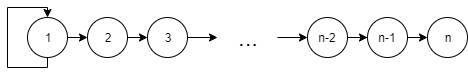

#### a) Set up a small experiment where you implement Hubs and Authorities on a graph of this form for a *specific* value of $n$, such as $n=6$.  Run the algorithm the "max-element equals 1" normalization, and use a convergence check using the max-norm ($L_\infty$) and a tolerance of $10^{-6}$.  Print the final Hubs and Authorities scores and how many iterations were run until convergence.

In [28]:
def createLMatrix(n): #return L matrix 
    L=[]
    
    for i in range(0,n-1):
        row=[0]*n
        if(i==0):
            row[i]=1
        row[i+1]=1
        L.append(row)
    row=[0]*n #for last node n which has not outlinks
    L.append(row)
    return np.array(L)

def oneStepAut(aut,hub,L,LT):
    #first step update authority
    aut = np.matmul(LT,hub)
    aut= aut/np.max(aut) #normalize
    #print("After Authority Update",hub,aut)
    return aut
def oneStepHub(aut,hub,L,LT):
    #first step update hubs
    hub = np.matmul(L, aut)
    hub = hub/np.max(hub)
    #print("After Hub Update",hub,aut)
    return hub
def dist_LInf(x,y):
    assert(len(x)== len(y))
    diff = [abs(x[i]-y[i]) for i in range(len(x))]
    maxDiff = np.max(diff)
    return maxDiff
n=6
def runSim(n,tol):
    L=createLMatrix(n)
    LT = np.transpose(L)
    hub = np.ones(n)
    aut = np.ones(n)
    #oldversions
    hub_old = np.zeros(n)
    aut_old = np.zeros(n)
    #tolerance check here
    max_change = np.max([dist_LInf(hub,hub_old), dist_LInf(aut,aut_old)])
    
    iterationCount=0
    while(max_change >tol):
        aut_old = aut
        hub_old = hub
        aut = oneStepAut(aut,hub_old,L,LT)
        hub = oneStepHub(aut,hub_old,L,LT)
        max_change = np.max([dist_LInf(hub,hub_old), dist_LInf(aut,aut_old)])
        iterationCount+=1
        #print(iterationCount,aut,hub,max_change) #----------------------uncomment here for full view
    print("Final Authorities: "+str(aut))
    print("Final Hubs: "+str(hub))
    print("Converged in "+str(iterationCount)+" iterations")
runSim(4,10**-6)

Final Authorities: [1.00000000e+00 1.00000000e+00 9.53674316e-07 9.53674316e-07]
Final Hubs: [1.00000000e+00 4.76837158e-07 4.76837158e-07 0.00000000e+00]
Converged in 21 iterations


#### b) Set up the system of equations that represent taking one step of the HITS algorithm.  In other words, use markdown to explicitly state what $A^{new}$ will be as a function of $H^{old}$, and $H^{new}$ as a function of $A^{old}$.   I suggest you use your code from a) to check your work!

So for one step of HITS algo, we first update the Authorities than update the Hubs with the newly updated Authorites.

- $A^{new}= L^T \times H^{old}$
- $A^{new}= \frac{A^{new}}{max(A^{new})}$ -normalize  after
- $H^{new}= L \times A^{new}$
- $H^{new}= \frac{H^{new}}{max(H^{new})}$ -normalize  after

#### c) What will be the exact values of $A^{new}_j$ and $H^{new}_j$ resulting from the $j$th pass through the HITS algorithm, after normalization?

The exact values after normalizing (I am not sure if this is right but it makes sense?) I just noticed the pattern from printing each iteration. (I pointed out which print I commented out that I used above) Also, this will be written under the assumption j starts at 1 not 0.  
- $A^{new}_j = [ 1, 1, \frac{1}{2^{j-1}},\frac{1}{2^{j-1}}] $
- $H^{new}_j = [ 1, \frac{1}{2^{j}}, \frac{1}{2^{j}},\frac{1}{2^{j}}]$

#### d) Your code in a) should have converged to the thereotical result from taking the *limit* (after many iterations) of the argument you constructed in c).  *Exactly* how many steps did it take until you converged?  Is this consistent with the theoretical result in part b?

It took 21 steps to converge. Yes I believe taking the limit of j - or j=21 in our case - of c is consistent with a step of HITS algo. As when HITS algorithm stops changings $A^{new}$ and $H^{new}$ than we have the eigenvector with largest eigenvalues of $L^TL$ for $A^{new}$ and the eigenvector with largest eigenvalues of $LL^T$ for $H^{new}$